In [ ]:
!git clone -b predict https://github.com/K4TEL/geo-twitter.git

Cloning into 'geo-twitter'...
remote: Enumerating objects: 348, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 348 (delta 17), reused 30 (delta 7), pack-reused 297
Receiving objects: 100% (348/348), 122.25 MiB | 22.58 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [3]:
! pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement torch==1.13.1 (from versions: 2.2.0)
ERROR: No matching distribution found for torch==1.13.1


In [5]:
import sys
sys.path.append('/content/geo-twitter')

from text_result import *

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.12 from "C:\Users\dyota\anaconda3\envs\d2k\python.exe"
  * The NumPy version is: "1.23.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: No module named 'numpy.core._multiarray_umath'


In [6]:
hub_model = 'k4tel/geo-bert-multilingual'
base_model = "bert-base-multilingual-cased"
use_pipeline = True

In [7]:
model_wrapper = load_model(base_model, hub_model, use_pipeline)

NameError: name 'load_model' is not defined

In [ ]:
text = "CIA and FBI can track anyone, and you willingly give the data away"
filter = True

In [ ]:
result = text_prediction(model_wrapper, text, use_pipeline, filter)

ind = np.argwhere(np.round(result.weights[0, :] * 100, 2) > 0)
significant = result.means[0, ind].reshape(-1, 2)
weights = result.weights[0, ind].flatten()

sig_weights = weights[weights > 0]

print(f"RESULT\t{len(sig_weights)} significant prediction outcome(s):")
for i in range(len(sig_weights)):
    point = f"lon: {'  lat: '.join(map(str, significant[i]))}"
    weight = str(np.round(sig_weights[i] * 100, 2))
    print(f"\tOut {i + 1}\t{weight}%\t-\t{point}")

TEXT	Filtering text: CIA and FBI can track anyone, and you willingly give the data away
RESULT	Post-processing raw model outputs: tensor([[-6.0516e+01,  2.5569e+01, -7.9416e+01,  3.6469e+01, -8.0159e+01,
          3.5575e+01,  1.9179e+01,  3.2108e+01, -7.4642e+01,  7.3557e+00,
         -1.4772e+01,  4.7532e+00,  3.3666e+00, -1.5320e+01, -1.5556e+01,
         -1.3382e-01,  5.2191e+01, -5.1923e+00,  1.5358e+02, -1.0547e+02]])
RESULT	Sorting all outputs for 5 outcomes by probabilistic weights
RESULT	2 significant prediction outcome(s):
	Out 1	80.0%	-	lon: -79.41557312011719  lat: 36.46946716308594
	Out 2	20.0%	-	lon: -80.15892791748047  lat: 35.574649810791016


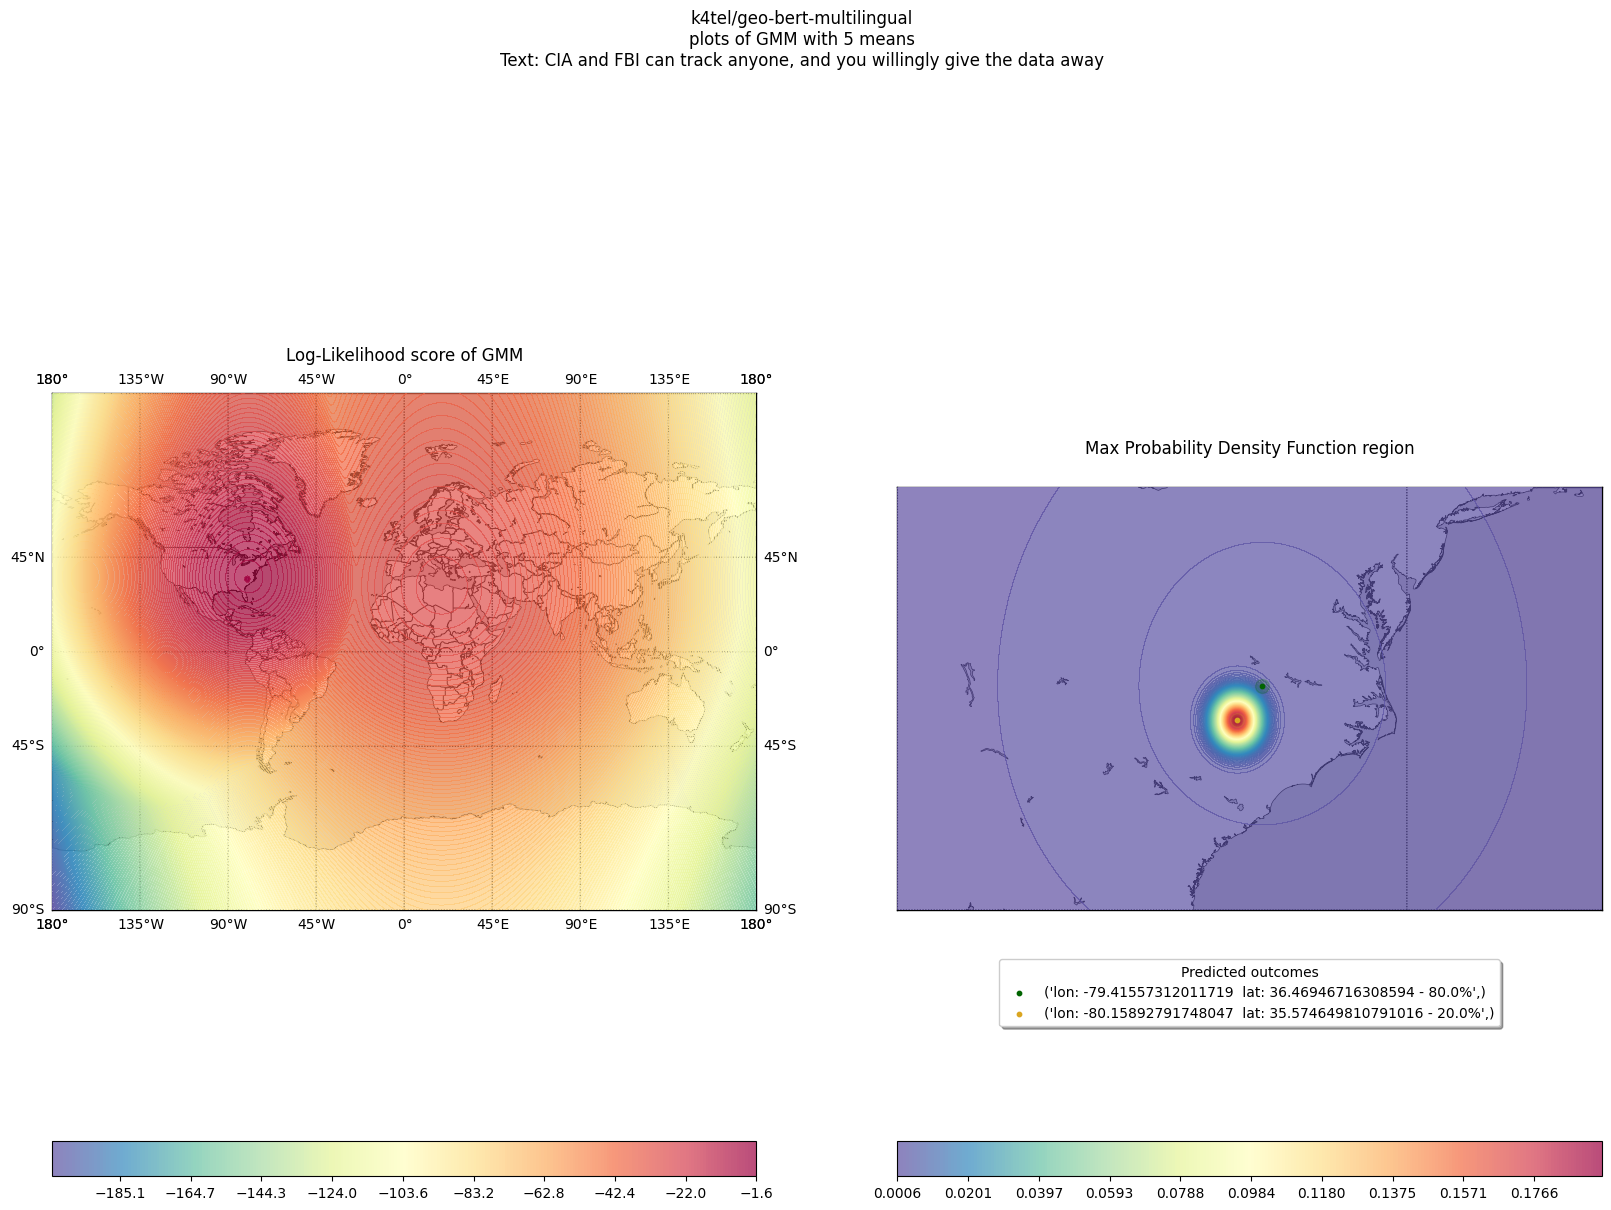

In [ ]:
visual = ResultVisuals(result)
visual.text_map_result()